# Football Score Predictions

In [32]:
import pandas as pd
#Functions from py files
from preprocess import main
from modelling import logistic_regression, forest_model, gradient_model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")


### Data Importing and Preprocessing

All preprocessing was done in py files and all files are included in the src folder.

In [4]:
X_train, X_test, y_train, y_test, X_train_dum, X_test_dum, y_train_dum, y_test_dum = main()

In [5]:
X_train.head(5)

,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HR,AR
338,2,1,16,11,7,3,8,6,12,10,0,0
134,0,1,1,19,1,10,1,7,14,8,1,0
7,0,2,9,11,2,4,12,5,13,7,0,0
149,0,1,12,20,5,9,9,9,10,11,0,0
359,0,1,16,10,6,3,11,4,8,12,0,0


In [6]:
y_train.head(5)

,FTHG,FTAG
338,3,1
134,0,3
7,0,2
149,1,2
359,0,1


The y colums that will be predicted are full-time home goals and away goals. They will both be predicted in two seperate models and it will be treated as a classification problem. The X column headers information can be found in the read me file. X dummy contains team name information in addition to match stats.


### Modelling

Each algorithm will have two models, one with dummy columns for home/away teams and one without.
- Logistic Regression
- Random Forest
- Gradient Boost

In [7]:
y_pred_hg_log, y_pred_ag_log = logistic_regression(X_train, X_test, y_train, y_test)
y_pred_hg_log_dum, y_pred_ag_log_dum = logistic_regression(X_train_dum, X_test_dum, y_train_dum, y_test_dum)

In [8]:
y_pred_hg_forest, y_pred_ag_forest = forest_model(X_train, X_test, y_train, y_test)
y_pred_hg_forest_dum, y_pred_ag_forest_dum = forest_model(X_train_dum, X_test_dum, y_train_dum, y_test_dum)

In [9]:
y_pred_hg_grad, y_pred_ag_grad = gradient_model(X_train, X_test, y_train, y_test)
y_pred_hg_grad_dum, y_pred_ag_grad_dum = gradient_model(X_train_dum, X_test_dum, y_train_dum, y_test_dum)

### Model Results

In [10]:
def model_result(y_true, y_pred):
    acc_score = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    con_matrix = confusion_matrix(y_true, y_pred)
    
    return acc_score, class_report, con_matrix

In [15]:
acc_score_hg_log, c_report_hg_log, matrix_hg_log = model_result(y_test["FTHG"], y_pred_hg_log)
acc_score_ag_log, c_report_ag_log, matrix_ag_log = model_result(y_test["FTAG"], y_pred_ag_log)
acc_score_hg_log_dum, c_report_hg_log_dum, matrix_hg_log_dum = model_result(y_test_dum["FTHG"], y_pred_hg_log_dum)
acc_score_ag_log_dum, c_report_ag_log_dum, matrix_ag_log_dum = model_result(y_test_dum["FTAG"], y_pred_ag_log_dum)

In [16]:
acc_score_hg_forest, c_report_hg_forest, matrix_hg_forest = model_result(y_test["FTHG"], y_pred_hg_forest)
acc_score_ag_forest, c_report_ag_forest, matrix_ag_forest = model_result(y_test["FTAG"], y_pred_ag_forest)
acc_score_hg_forest_dum, c_report_hg_forest_dum, matrix_hg_forest_dum = model_result(y_test_dum["FTHG"], y_pred_hg_forest_dum)
acc_score_ag_forest_dum, c_report_ag_forest_dum, matrix_ag_forest_dum = model_result(y_test_dum["FTAG"], y_pred_ag_forest_dum)

In [17]:
acc_score_hg_grad, c_report_hg_grad, matrix_hg_grad = model_result(y_test["FTHG"], y_pred_hg_grad)
acc_score_ag_grad, c_report_ag_grad, matrix_ag_grad = model_result(y_test["FTAG"], y_pred_ag_grad)
acc_score_hg_grad_dum, c_report_hg_grad_dum, matrix_hg_grad_dum = model_result(y_test_dum["FTHG"], y_pred_hg_grad_dum)
acc_score_ag_grad_dum, c_report_ag_grad_dum, matrix_ag_grad_dum = model_result(y_test_dum["FTAG"], y_pred_ag_grad_dum)

### Logistic Regression

In [22]:
print(acc_score_hg_log, acc_score_ag_log)
print(acc_score_hg_log_dum, acc_score_ag_log_dum)

0.24342105263157895 0.5197368421052632
0.23026315789473684 0.4934210526315789


### Random Forest

In [20]:
print(acc_score_hg_forest, acc_score_ag_forest)
print(acc_score_hg_forest_dum, acc_score_ag_forest_dum)

0.23684210526315788 0.506578947368421
0.24671052631578946 0.5032894736842105


### Gradient Boost

In [21]:
print(acc_score_hg_grad, acc_score_ag_grad)
print(acc_score_hg_grad_dum, acc_score_ag_grad_dum)

0.24671052631578946 0.5263157894736842
0.2236842105263158 0.506578947368421


It looks like all the models are performing better without the dummy columns. Also, the accuracy is around half for home goal predictions for all models. 

In [23]:
print(c_report_hg_log)

              precision    recall  f1-score   support

           0       0.20      0.33      0.24        73
           1       0.33      0.38      0.35        93
           2       0.28      0.17      0.21        76
           3       0.08      0.06      0.07        33
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         1

    accuracy                           0.24       304
   macro avg       0.13      0.13      0.13       304
weighted avg       0.23      0.24      0.23       304



In [24]:
print(matrix_hg_log)

[[24 22 14  9  4  0  0]
 [34 35 18  6  0  0  0]
 [30 25 13  8  0  0  0]
 [16 14  1  2  0  0  0]
 [10  6  0  0  0  0  0]
 [ 8  3  0  1  0  0  0]
 [ 1  0  0  0  0  0  0]]


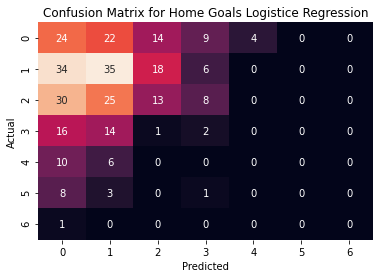

In [27]:
sns.heatmap(matrix_hg_log, annot=True, fmt='g', vmin=0, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Home Goals Logistice Regression")
plt.show()

In [30]:
y_train["FTHG"].value_counts()

1    404
0    300
2    282
3    139
4     60
5     24
6      3
7      2
8      1
9      1
Name: FTHG, dtype: int64

All the models are performing very poorly in home goal predictions and overall. Now we can explore this further and look into some learning curves to find the best parameters and improve the model.

Gradient boost without the dummy variables performed the best overall, so this will be the model that will be explored and tuned.

In [63]:
clf = GridSearchCV(GradientBoostingClassifier(), 
                          { "n_estimators":[3,5,10]},
                  cv=5, return_train_score=False)

In [64]:
clf.fit(X_train, y_train["FTHG"])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [3, 5, 10]})

In [65]:
clf.cv_results_

{'mean_fit_time': array([0.05001769, 0.07234802, 0.14299412]),
 'std_fit_time': array([0.0073124 , 0.00328584, 0.006676  ]),
 'mean_score_time': array([0.02617474, 0.00228701, 0.00245032]),
 'std_score_time': array([4.60009903e-02, 1.83335051e-05, 2.53991778e-05]),
 'param_n_estimators': masked_array(data=[3, 5, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 3}, {'n_estimators': 5}, {'n_estimators': 10}],
 'split0_test_score': array([0.45901639, 0.48360656, 0.5       ]),
 'split1_test_score': array([0.46090535, 0.45679012, 0.48971193]),
 'split2_test_score': array([0.4691358 , 0.52263374, 0.51440329]),
 'split3_test_score': array([0.45679012, 0.46090535, 0.46502058]),
 'split4_test_score': array([0.48148148, 0.47325103, 0.48148148]),
 'mean_test_score': array([0.46546583, 0.47943736, 0.49012346]),
 'std_test_score': array([0.00902918, 0.0235708 , 0.01668571]),
 'rank_test_score': array([3, 2, 1], dtype=int

In [66]:
clf.best_score_

0.4901234567901234

In [53]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050529,0.008993,0.002566,0.000554,3,{'n_estimators': 3},0.459016,0.456790,0.469136,0.456790,0.481481,0.464643,0.009578,3
1,0.071974,0.003731,0.002357,0.000059,5,{'n_estimators': 5},0.483607,0.452675,0.526749,0.460905,0.473251,0.479437,0.025899,2
2,0.148171,0.015911,0.002486,0.000047,10,{'n_estimators': 10},0.500000,0.485597,0.518519,0.465021,0.481481,0.490123,0.018051,1


In [59]:
clf_ag = GridSearchCV(GradientBoostingClassifier(), 
                          { "n_estimators":[3,5,10]},
                  cv=5, return_train_score=False)

In [60]:
clf_ag.fit(X_train, y_train["FTAG"])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [3, 5, 10]})

In [61]:
df_ag = pd.DataFrame(clf_ag.cv_results_)
df_ag

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045308,0.012393,0.002315,0.000231,3,{'n_estimators': 3},0.512295,0.510288,0.522634,0.522634,0.539095,0.521389,0.010223,3
1,0.059102,0.002849,0.002240,0.000025,5,{'n_estimators': 5},0.524590,0.510288,0.514403,0.526749,0.547325,0.524671,0.012883,2
2,0.130742,0.012747,0.003015,0.000528,10,{'n_estimators': 10},0.528689,0.522634,0.506173,0.530864,0.559671,0.529606,0.017344,1


In [62]:
clf_ag.best_score_

0.5296060176752345